In [2]:
import numpy as np
from scipy.stats import norm
from scipy.misc import imsave
import matplotlib.pyplot as plt
import cv2
import os
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from numpy import genfromtxt

In [3]:
deltas = genfromtxt(fname = '/Users/ckruse/Downloads/faithful.csv', delimiter = ',')

In [4]:
np.shape(deltas)

(58511,)

In [5]:
#Normalize deltas between -1 and 1

print(np.max(deltas))

delt = deltas/np.max(deltas)*2 - 1
print(np.max(delt))

#Clip the last 11 values to make it easier to break into sequences of length 13

# delt = delt[0:58500]
# plt.hist(delt)
# plt.show()

162.0
1.0


In [7]:
numSequences = 500000
seqLen = 25
sequences = np.zeros([numSequences, seqLen])

for i in range(0,numSequences):
    seed = np.random.randint(seqLen,np.size(delt)-seqLen)
    sequences[i,:] = delt[seed-seqLen:seed]
    
#Split up the time series vector into an x and y
x = sequences[:,0:seqLen-1]
y = sequences[:,seqLen-1]
x = x.reshape(x.shape[0], x.shape[1],1)
y = y.reshape(y.shape[0])

print(x.shape)
print(y.shape)

(500000, 24, 1)
(500000,)


In [10]:
from keras.layers import Conv1D, Dense, MaxPooling1D, Flatten

model = Sequential()
#model.add(Conv2D(8, kernel_size=(1, 3),
#                 activation='relu', padding='same',
#                 input_shape=x.shape))

# model.add(Conv2D(8, (1, 3), activation='relu', padding='same'))

#model.add(Flatten())
model.add(Conv1D(filters=8, kernel_size=4, activation='relu', input_shape=(24,1), strides=1))
model.add(Conv1D(filters=16, kernel_size=4, activation='relu', strides=1))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss=keras.losses.mean_squared_error,
              optimizer=keras.optimizers.Adam(),
              metrics=['mse'])



Train on 450000 samples, validate on 50000 samples
Epoch 1/10
450000/450000 [==============================] - 46s 101us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.0083 - val_mean_squared_error: 0.0083
Epoch 2/10
450000/450000 [==============================] - 49s 109us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0083 - val_mean_squared_error: 0.0083
Epoch 3/10
450000/450000 [==============================] - 47s 105us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0081 - val_mean_squared_error: 0.0081
Epoch 4/10
450000/450000 [==============================] - 47s 104us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0081 - val_mean_squared_error: 0.0081
Epoch 5/10
450000/450000 [==============================] - 46s 101us/step - lo

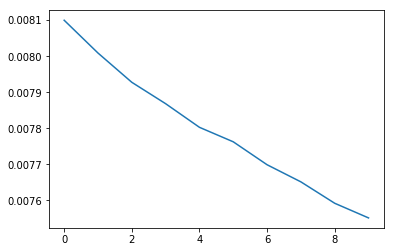

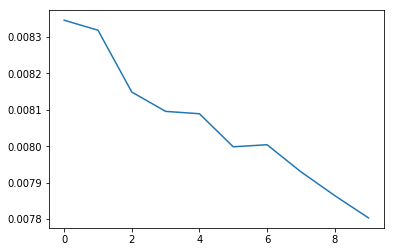

In [13]:
from keras.models import load_model

epochs = 10

model = load_model('/Users/ckruse/Documents/python/oldFaithful.h5')
history = model.fit(x,
                    y,
                    epochs=epochs,
                    verbose=1,
                    batch_size=32,
                    validation_split=0.1,
                    shuffle=True)

#model.save('/Users/ckruse/Documents/python/oldFaithful.h5')
plt.plot(history.history['loss'])
plt.show()

plt.plot(history.history['val_loss'])
plt.show()

#score = model.evaluate(data_stack, label_stack, verbose=1)
#print('Test loss:', score[0])
#print('Test accuracy:', score[1])
#model.save('/Users/ckruse/Documents/python/soccer/model.h5')

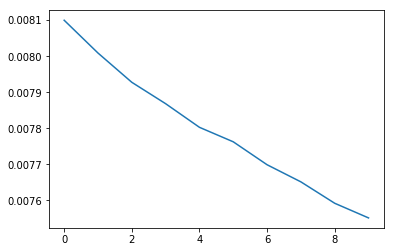

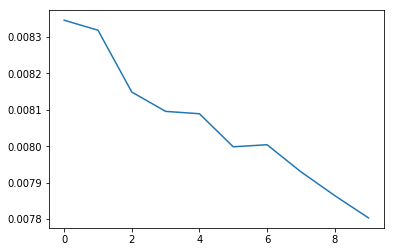

In [14]:
model.save('/Users/ckruse/Documents/python/oldFaithful.h5')
plt.plot(history.history['loss'])
plt.show()

plt.plot(history.history['val_loss'])
plt.show()

In [33]:
a = x[0,:]
print(a)
print(y[0])

[0.17283951 0.19753086 0.0617284  0.12345679 0.35802469 0.27160494
 0.18518519 0.17283951 0.12345679 0.13580247 0.17283951 0.27160494]
0.09876543209876543


In [45]:
a = np.reshape(a,a.shape[0],1)

a.shape
#model.predict(a)

(12,)


(12,)